16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (Iris Dataset): {accuracy:.4f}")

Model Accuracy (Iris Dataset): 1.0000


17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances.

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier with Gini Impurity criterion
dt_classifier_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
dt_classifier_gini.fit(X_train, y_train)

# Print feature importances
print("Feature Importances (Gini Impurity):")
for feature, importance in zip(feature_names, dt_classifier_gini.feature_importances_):
    print(f"- {feature}: {importance:.4f}")

Feature Importances (Gini Impurity):
- sepal length (cm): 0.0000
- sepal width (cm): 0.0191
- petal length (cm): 0.8933
- petal width (cm): 0.0876


18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier with Entropy criterion
dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
dt_classifier_entropy.fit(X_train, y_train)

# Make predictions on the test set
y_pred_entropy = dt_classifier_entropy.predict(X_test)

# Calculate and print the accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Model Accuracy (Entropy Criterion): {accuracy_entropy:.4f}")

Model Accuracy (Entropy Criterion): 0.9778


19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE).

In [5]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load a housing dataset (California Housing dataset as an example)
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_reg = dt_regressor.predict(X_test)

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_reg)
print(f"Mean Squared Error (MSE) for Decision Tree Regressor: {mse:.4f}")

Mean Squared Error (MSE) for Decision Tree Regressor: 0.5280


20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.

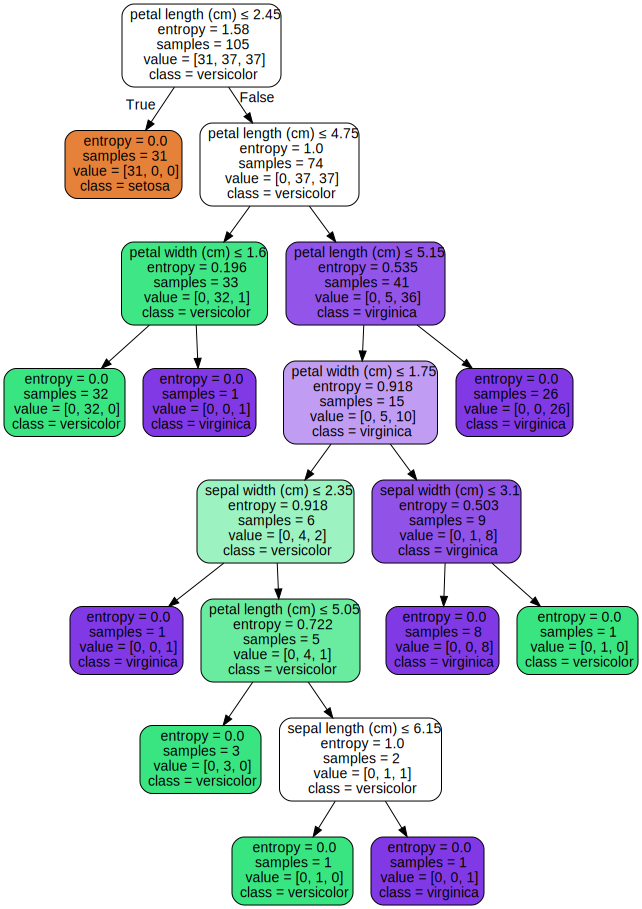

In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
from IPython.display import display

# 1. Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# 4. Export the tree in DOT format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# 5. Display the decision tree inline
graph = graphviz.Source(dot_data)
display(graph)


21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree.

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Model with max_depth=3 (Pre-pruning) ---
dt_classifier_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier_pruned.fit(X_train, y_train)
y_pred_pruned = dt_classifier_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy with max_depth=3: {accuracy_pruned:.4f}")

# --- Fully grown tree (default) ---
dt_classifier_full = DecisionTreeClassifier(random_state=42) # No max_depth specified
dt_classifier_full.fit(X_train, y_train)
y_pred_full = dt_classifier_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Accuracy with fully grown tree: {accuracy_full:.4f}")

if accuracy_pruned > accuracy_full:
    print("\nMax depth of 3 resulted in higher accuracy (less overfitting).")
elif accuracy_full > accuracy_pruned:
    print("\nFully grown tree resulted in higher accuracy (may indicate more complex relationships or overfitting).")
else:
    print("\nBoth trees achieved the same accuracy.")

Accuracy with max_depth=3: 1.0000
Accuracy with fully grown tree: 1.0000

Both trees achieved the same accuracy.


22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree.

In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Model with min_samples_split=5 (Pre-pruning) ---
dt_classifier_min_split = DecisionTreeClassifier(min_samples_split=5, random_state=42)
dt_classifier_min_split.fit(X_train, y_train)
y_pred_min_split = dt_classifier_min_split.predict(X_test)
accuracy_min_split = accuracy_score(y_test, y_pred_min_split)
print(f"Accuracy with min_samples_split=5: {accuracy_min_split:.4f}")

# --- Default tree ---
dt_classifier_default = DecisionTreeClassifier(random_state=42)
dt_classifier_default.fit(X_train, y_train)
y_pred_default = dt_classifier_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default min_samples_split: {accuracy_default:.4f}")

if accuracy_min_split > accuracy_default:
    print("\nmin_samples_split=5 resulted in higher accuracy.")
elif accuracy_default > accuracy_min_split:
    print("\nDefault min_samples_split resulted in higher accuracy.")
else:
    print("\nBoth trees achieved the same accuracy.")

Accuracy with min_samples_split=5: 1.0000
Accuracy with default min_samples_split: 1.0000

Both trees achieved the same accuracy.


23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data.

In [12]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # For feature scaling

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Model with unscaled data ---
dt_classifier_unscaled = DecisionTreeClassifier(random_state=42)
dt_classifier_unscaled.fit(X_train, y_train)
y_pred_unscaled = dt_classifier_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy with unscaled data: {accuracy_unscaled:.4f}")

# --- Apply feature scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model with scaled data ---
dt_classifier_scaled = DecisionTreeClassifier(random_state=42)
dt_classifier_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = dt_classifier_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaled data: {accuracy_scaled:.4f}")

print("\nObservation: Decision Trees are generally not sensitive to feature scaling.")
if accuracy_scaled > accuracy_unscaled:
    print("In this specific case, scaled data resulted in higher accuracy.")
elif accuracy_unscaled > accuracy_scaled:
    print("In this specific case, unscaled data resulted in higher accuracy.")
else:
    print("Both scaled and unscaled data resulted in the same accuracy.")

Accuracy with unscaled data: 1.0000
Accuracy with scaled data: 1.0000

Observation: Decision Trees are generally not sensitive to feature scaling.
Both scaled and unscaled data resulted in the same accuracy.


24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification.

In [13]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset (which is multiclass)
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a base Decision Tree Classifier
base_dt_classifier = DecisionTreeClassifier(random_state=42)

# Wrap the Decision Tree Classifier with OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(base_dt_classifier)

# Train the OvR classifier
ovr_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ovr = ovr_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f"Accuracy of Decision Tree with One-vs-Rest strategy: {accuracy_ovr:.4f}")

# For comparison, accuracy of a direct multiclass Decision Tree:
dt_direct = DecisionTreeClassifier(random_state=42)
dt_direct.fit(X_train, y_train)
y_pred_direct = dt_direct.predict(X_test)
accuracy_direct = accuracy_score(y_test, y_pred_direct)
print(f"Accuracy of direct multiclass Decision Tree: {accuracy_direct:.4f}")

Accuracy of Decision Tree with One-vs-Rest strategy: 1.0000
Accuracy of direct multiclass Decision Tree: 1.0000


25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores.

Feature Importance Scores:
             Feature  Importance
2  petal length (cm)    0.893264
3   petal width (cm)    0.087626
1   sepal width (cm)    0.019110
0  sepal length (cm)    0.000000


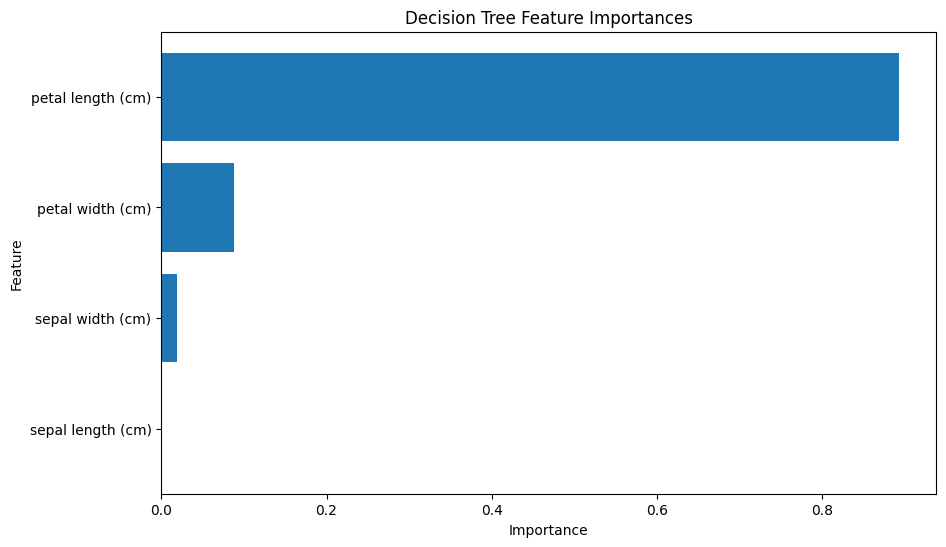

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Get feature importances
importances = dt_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importance Scores:")
print(feature_importances_df)

# Optional: Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importances")
plt.gca().invert_yaxis() # Puts the most important feature at the top
plt.show()

26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.

In [15]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load a housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Regressor with max_depth=5 ---
dt_regressor_pruned = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor_pruned.fit(X_train, y_train)
y_pred_pruned_reg = dt_regressor_pruned.predict(X_test)
mse_pruned_reg = mean_squared_error(y_test, y_pred_pruned_reg)
r2_pruned_reg = r2_score(y_test, y_pred_pruned_reg)
print(f"Regressor (max_depth=5) - MSE: {mse_pruned_reg:.4f}, R-squared: {r2_pruned_reg:.4f}")

# --- Unrestricted Regressor (default) ---
dt_regressor_full = DecisionTreeRegressor(random_state=42)
dt_regressor_full.fit(X_train, y_train)
y_pred_full_reg = dt_regressor_full.predict(X_test)
mse_full_reg = mean_squared_error(y_test, y_pred_full_reg)
r2_full_reg = r2_score(y_test, y_pred_full_reg)
print(f"Regressor (unrestricted) - MSE: {mse_full_reg:.4f}, R-squared: {r2_full_reg:.4f}")

if mse_pruned_reg < mse_full_reg:
    print("\nRegressor with max_depth=5 performed better (lower MSE).")
elif mse_full_reg < mse_pruned_reg:
    print("\nUnrestricted Regressor performed better (lower MSE).")
else:
    print("\nBoth regressors performed similarly.")

Regressor (max_depth=5) - MSE: 0.5211, R-squared: 0.6030
Regressor (unrestricted) - MSE: 0.5280, R-squared: 0.5977

Regressor with max_depth=5 performed better (lower MSE).


27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy.

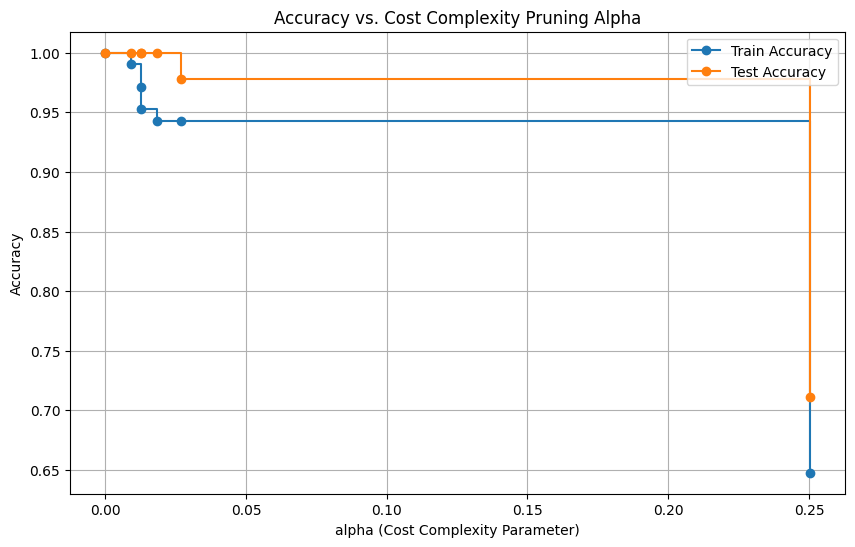


Optimal ccp_alpha for best test accuracy: 0.0000
Accuracy of the final pruned model with optimal alpha: 1.0000


In [16]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a full Decision Tree
dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)

# Calculate the effective alphas for pruning
path = dt_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Filter out duplicate alphas (optional, can happen due to floating point precision)
ccp_alphas = ccp_alphas[:-1] # Remove the last alpha (which corresponds to a single node tree)

# Train trees for each alpha and store accuracy
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Plot the accuracy vs. alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.xlabel("alpha (Cost Complexity Parameter)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Cost Complexity Pruning Alpha")
plt.legend()
plt.grid(True)
plt.show()

# Find the best alpha based on test accuracy
best_alpha_idx = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[best_alpha_idx]
print(f"\nOptimal ccp_alpha for best test accuracy: {best_alpha:.4f}")

# Train the final pruned model with the best alpha
dt_pruned_best_ccp = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_pruned_best_ccp.fit(X_train, y_train)
final_accuracy = accuracy_score(y_test, dt_pruned_best_ccp.predict(X_test))
print(f"Accuracy of the final pruned model with optimal alpha: {final_accuracy:.4f}")

28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score.

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')       # 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')             # 'weighted' for multiclass

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-Score (weighted): 1.0000


29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.

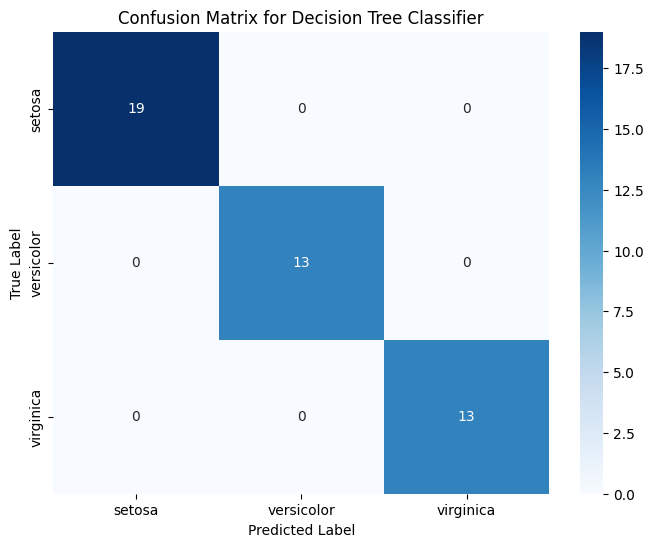

In [18]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.

In [19]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10, None], # None means full depth
    'min_samples_split': [2, 5, 10, 15]
}

# Create GridSearchCV object
# cv=5 means 5-fold cross-validation
# scoring='accuracy' means we optimize for accuracy
grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1, # Use all available cores
                           verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_dt_model = grid_search.best_estimator_
y_pred_tuned = best_dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Test accuracy of the best model: {test_accuracy:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found by GridSearchCV: {'max_depth': 5, 'min_samples_split': 10}
Best cross-validation accuracy: 0.9429
Test accuracy of the best model: 1.0000
